<a href="https://colab.research.google.com/github/Annettteee/annette-colab-projects/blob/main/MassAI_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Formulas: https://docs.google.com/presentation/d/1_ZExt1bBNjJo08nFbHpEASThsIFMzoU2-qdsGrRP1JY/edit?slide=id.g368928a1fed_0_74#slide=id.g368928a1fed_0_74


Imports

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Initialize Data

In [ ]:
# download data from here: https://www.kaggle.com/c/digit-recognizer/data?select=train.csv
# insert into folder icon on left (google colab locally stores data, temporarily)

In [ ]:
data = pd.read_csv('/content/train.csv')

Data Setup

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([6, 2, 1, ..., 4, 9, 1])

Params / Function setup

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
  # for example, if we predict 4, we use the one hot encoding to use [0, 0, 0, 0, 1, 0,...] as the value as opposed to 4
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

Implementing Training

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

Running Training Step

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 150)

Iteration:  0
[1 3 5 ... 1 2 5] [6 2 1 ... 4 9 1]
0.07902439024390244
Iteration:  10
[2 2 2 ... 2 2 5] [6 2 1 ... 4 9 1]
0.1639268292682927
Iteration:  20
[6 2 1 ... 2 2 5] [6 2 1 ... 4 9 1]
0.2275609756097561
Iteration:  30
[6 1 1 ... 6 2 1] [6 2 1 ... 4 9 1]
0.27907317073170734
Iteration:  40
[6 7 1 ... 6 7 1] [6 2 1 ... 4 9 1]
0.32141463414634147
Iteration:  50
[6 7 1 ... 6 7 1] [6 2 1 ... 4 9 1]
0.36297560975609755
Iteration:  60
[6 7 1 ... 6 7 1] [6 2 1 ... 4 9 1]
0.40282926829268295
Iteration:  70
[6 7 1 ... 4 7 1] [6 2 1 ... 4 9 1]
0.4493170731707317
Iteration:  80
[6 7 1 ... 4 7 1] [6 2 1 ... 4 9 1]
0.4791219512195122
Iteration:  90
[6 7 1 ... 4 7 1] [6 2 1 ... 4 9 1]
0.5068048780487805
Iteration:  100
[6 7 1 ... 4 7 1] [6 2 1 ... 4 9 1]
0.5401951219512195
Iteration:  110
[4 2 1 ... 4 7 1] [6 2 1 ... 4 9 1]
0.567390243902439
Iteration:  120
[4 2 1 ... 4 7 1] [6 2 1 ... 4 9 1]
0.5898292682926829
Iteration:  130
[4 2 1 ... 4 7 1] [6 2 1 ... 4 9 1]
0.6117317073170732
Iteration:  1

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
  # for example, if we predict 4, we use the one hot encoding to use [0, 0, 0, 0, 1, 0,...] as the value as opposed to 4
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  6


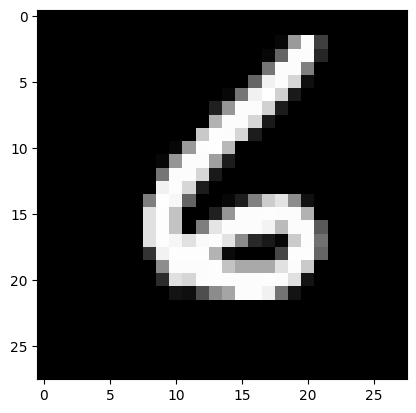

Prediction:  [2]
Label:  2


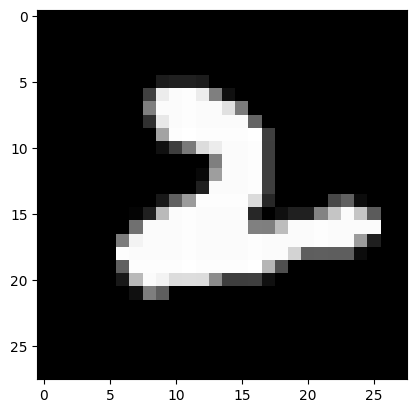

Prediction:  [1]
Label:  1


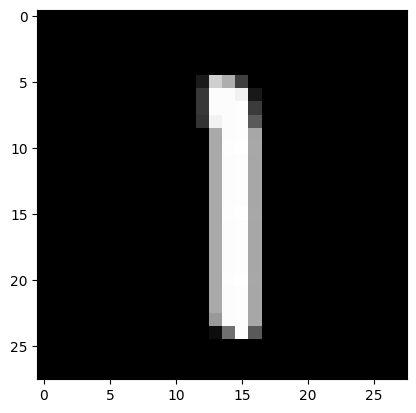

Prediction:  [1]
Label:  1


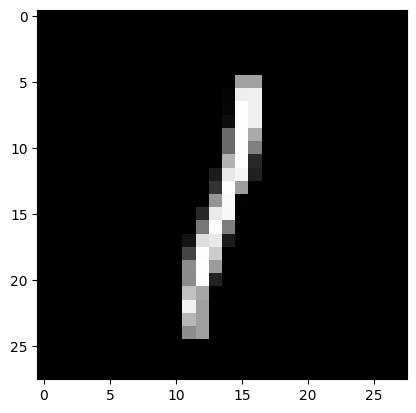

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 9 8 6 7 7 2 2 4 2 7 0 4 7 7 1 8 6 3 3 5 6 1 7 0 2 3 3 8 0 8 0 2 6 4 9 5
 3 6 1 2 3 1 8 4 1 1 2 1 9 8 1 0 4 6 8 1 7 1 1 9 0 9 9 2 3 8 2 8 0 7 6 0 8
 3 7 6 5 6 7 7 4 6 1 8 4 5 0 9 8 1 4 9 6 3 3 1 2 4 6 4 3 8 2 0 8 0 6 3 6 8
 0 1 9 1 6 0 6 6 3 0 1 9 6 1 2 3 3 3 0 6 2 8 5 0 9 0 5 5 0 8 2 9 9 7 3 9 2
 6 0 0 8 4 2 1 2 9 7 5 0 1 5 3 2 7 9 9 5 7 1 3 4 7 3 5 1 5 9 1 9 4 5 9 8 6
 8 8 5 0 4 4 1 1 2 3 1 0 8 6 1 4 3 4 9 9 7 2 2 6 3 1 1 6 3 6 0 1 6 8 3 2 9
 1 6 1 1 9 4 5 8 3 7 9 4 7 3 7 3 7 7 9 4 6 2 2 7 0 7 5 6 6 6 4 1 3 6 6 6 1
 5 8 8 7 2 5 5 6 3 0 8 3 5 8 3 1 0 1 3 0 0 0 2 2 8 3 0 9 6 5 9 9 0 5 4 1 2
 3 0 7 8 7 1 3 0 2 9 7 7 0 8 4 5 8 1 7 2 1 9 7 7 3 2 9 8 1 3 0 0 3 8 5 6 0
 9 8 5 3 7 0 7 3 8 3 4 4 8 6 5 2 7 7 0 9 2 4 8 7 2 4 2 1 4 7 4 5 1 9 8 7 4
 3 7 9 2 8 1 0 9 1 9 8 0 1 2 3 7 8 0 9 9 3 1 1 1 3 2 9 2 7 6 4 4 4 3 9 9 9
 0 6 4 0 1 3 9 9 3 4 7 1 9 1 9 8 7 1 4 3 7 2 8 1 1 1 1 7 7 9 1 3 1 3 3 6 3
 6 6 2 0 1 7 8 1 2 5 7 2 9 8 0 8 0 9 1 8 3 6 2 1 3 9 6 6 2 1 2 1 8 3 1 8 5
 1 5 2 1 0 5 7 4 1 0 9 6 

np.float64(0.648)

solutions: https://github.com/MassachusettsAI/Workshop-Notebooks/blob/master/MassAI_CV_Workshop_(Answers).ipynb